## Breast Cancer Wisconsin Classification Analysis
### Date: March 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


## Loading the Dataset Using scikit-learn's built-in dataset

In [4]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

## Create a DataFrame for better visualization

In [5]:
columns = cancer.feature_names
df = pd.DataFrame(X, columns=columns)
df['diagnosis'] = y

In [6]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of Benign samples: {sum(y == 0)}")
print(f"Number of Malignant samples: {sum(y == 1)}")

Dataset Shape: (569, 31)
Number of Benign samples: 212
Number of Malignant samples: 357


## Display first 10 rows of the dataset

In [8]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


## Basic data exploration

In [9]:
print("Feature Statistics:")
df.describe().T[['mean', 'min', 'max']]

Feature Statistics:


,mean,min,max
mean radius,14.127292,6.981000,28.11000
mean texture,19.289649,9.710000,39.28000
mean perimeter,91.969033,43.790000,188.50000
mean area,654.889104,143.500000,2501.00000
mean smoothness,0.096360,0.052630,0.16340
mean compactness,0.104341,0.019380,0.34540
mean concavity,0.088799,0.000000,0.42680
mean concave points,0.048919,0.000000,0.20120
mean symmetry,0.181162,0.106000,0.30400
mean fractal dimension,0.062798,0.049960,0.09744


## Checking for missing values

In [10]:
print(f"\nMissing values in dataset: {df.isnull().sum().sum()}")


Missing values in dataset: 0


## Visualizing class distribution

<ipython-input-11-aa0f68b5e88c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


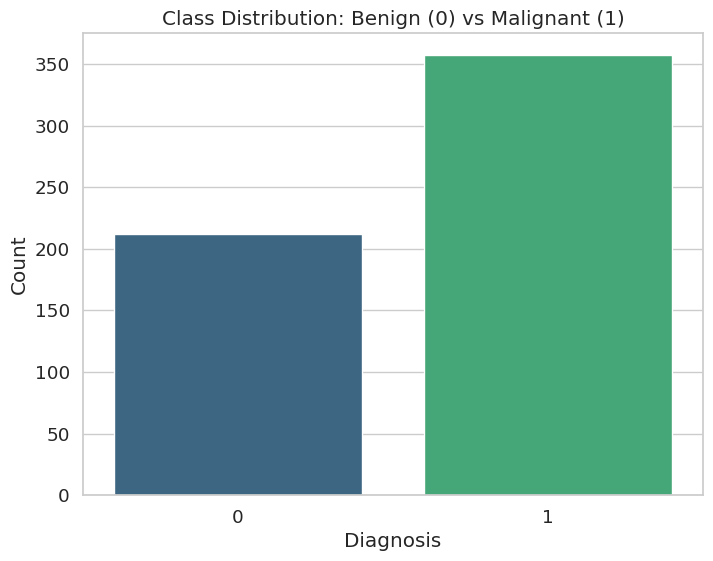

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Class Distribution: Benign (0) vs Malignant (1)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## Visualizing correlation between features

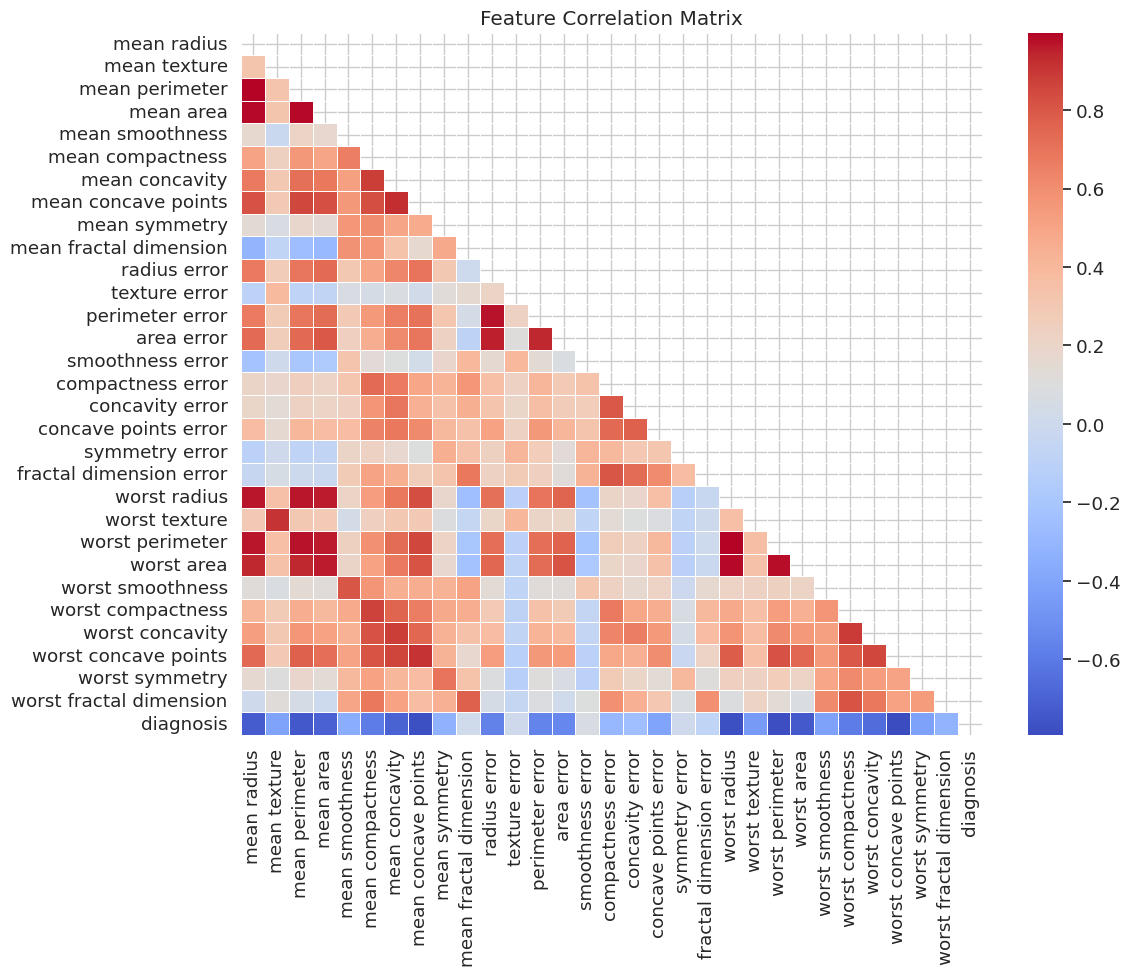

In [12]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Spliting the Dataset (80-20 ratio)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (455, 30)
Testing set shape: (114, 30)


## Feature scaling its important for KNN

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training a K-Nearest Neighbors (KNN) Classifier
### Let's first find the optimal K value

In [16]:
k_values = range(1, 30)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

### Plot the results

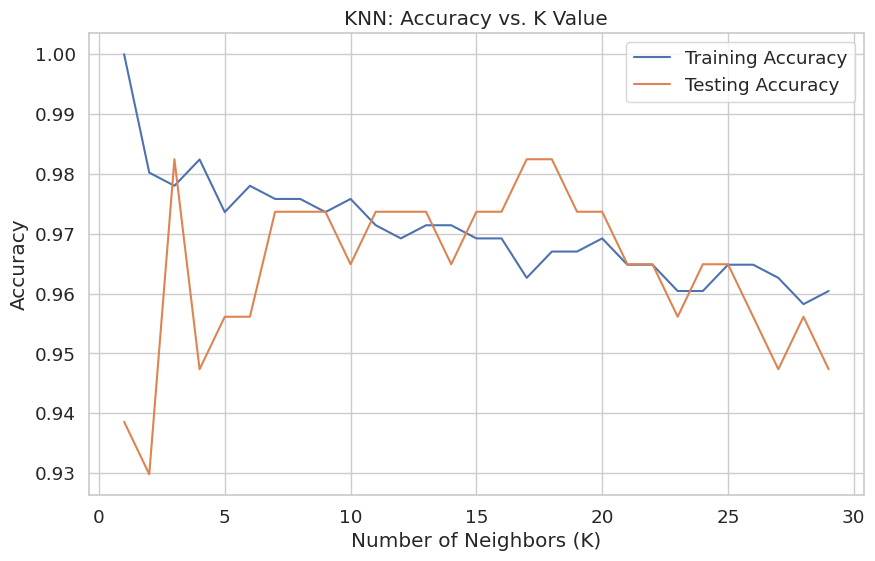

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. K Value')
plt.legend()
plt.grid(True)
plt.show()

### Find the optimal K value

In [18]:
optimal_k = k_values[np.argmax(test_scores)]
print(f"Optimal K value: {optimal_k}")

Optimal K value: 3


## Train the final KNN model with the optimal K

In [19]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluating the Model

In [20]:
y_pred = knn_optimal.predict(X_test_scaled)

## Calculate evaluation metrics

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## Printing the metrics

In [22]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1 Score: 0.9863


## Confusion Matrix


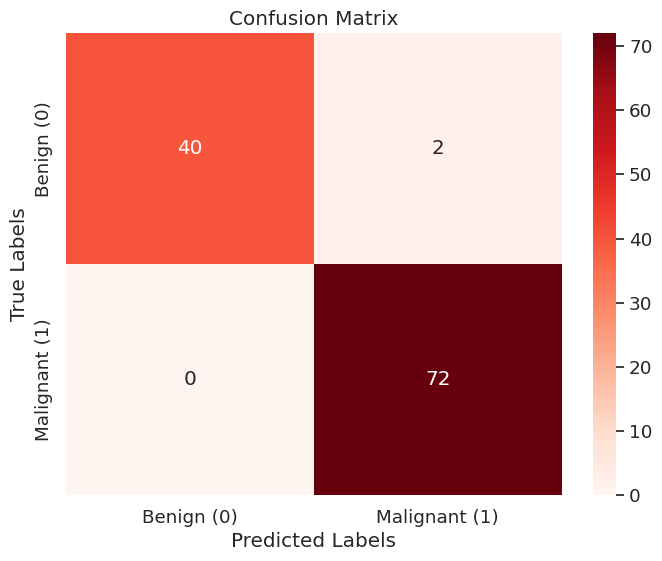

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['Benign (0)', 'Malignant (1)'])
plt.yticks([0.5, 1.5], ['Benign (0)', 'Malignant (1)'])
plt.show()


## Classification Report


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.95      0.98        42
   Malignant       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Explain the Evaluation Metrics

### Let's extract values from the confusion matrix

In [27]:
tn, fp, fn, tp = cm.ravel()

print("Evaluation Metrics Explained:")
print("\nConfusion Matrix Components:")
print(f"True Positives (TP): {tp} - Correctly predicted malignant tumors")
print(f"True Negatives (TN): {tn} - Correctly predicted benign tumors")
print(f"False Positives (FP): {fp} - Benign tumors incorrectly predicted as malignant")
print(f"False Negatives (FN): {fn} - Malignant tumors incorrectly predicted as benign")

print("\nFormulas and Explanations:")

print("\n1. Accuracy:")
print("   - Formula: (TP + TN) / (TP + TN + FP + FN)")
print("   - Definition: Proportion of all correct predictions among the total number of cases examined")
print("   - Interpretation: Overall correctness of the model")

print("\n2. Precision:")
print("   - Formula: TP / (TP + FP)")
print("   - Definition: Proportion of correctly identified positive cases among all predicted positive cases")
print("   - Interpretation: When the model predicts malignant, how often is it correct?")

print("\n3. Recall (Sensitivity):")
print("   - Formula: TP / (TP + FN)")
print("   - Definition: Proportion of correctly identified positive cases among all actual positive cases")
print("   - Interpretation: Of all actual malignant tumors, how many did the model correctly identify?")

print("\n4. F1 Score:")
print("   - Formula: 2 * (Precision * Recall) / (Precision + Recall)")
print("   - Definition: Harmonic mean of precision and recall")
print("   - Interpretation: Balance between precision and recall")

Evaluation Metrics Explained:

Confusion Matrix Components:
True Positives (TP): 72 - Correctly predicted malignant tumors
True Negatives (TN): 40 - Correctly predicted benign tumors
False Positives (FP): 2 - Benign tumors incorrectly predicted as malignant
False Negatives (FN): 0 - Malignant tumors incorrectly predicted as benign

Formulas and Explanations:

1. Accuracy:
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Definition: Proportion of all correct predictions among the total number of cases examined
   - Interpretation: Overall correctness of the model

2. Precision:
   - Formula: TP / (TP + FP)
   - Definition: Proportion of correctly identified positive cases among all predicted positive cases
   - Interpretation: When the model predicts malignant, how often is it correct?

3. Recall (Sensitivity):
   - Formula: TP / (TP + FN)
   - Definition: Proportion of correctly identified positive cases among all actual positive cases
   - Interpretation: Of all actual malignant tum

## Mathematically Showing Final Test Metrics

In [28]:
print("Mathematical Calculation of Metrics:")

# Accuracy calculation
calculated_accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"\nAccuracy Calculation:")
print(f"(TP + TN) / (TP + TN + FP + FN) = ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn}) = {calculated_accuracy:.4f}")

# Precision calculation
calculated_precision = tp / (tp + fp)
print(f"\nPrecision Calculation:")
print(f"TP / (TP + FP) = {tp} / ({tp} + {fp}) = {calculated_precision:.4f}")

# Recall calculation
calculated_recall = tp / (tp + fn)
print(f"\nRecall Calculation:")
print(f"TP / (TP + FN) = {tp} / ({tp} + {fn}) = {calculated_recall:.4f}")

# F1 Score calculation
calculated_f1 = 2 * (calculated_precision * calculated_recall) / (calculated_precision + calculated_recall)
print(f"\nF1 Score Calculation:")
print(f"2 * (Precision * Recall) / (Precision + Recall) = 2 * ({calculated_precision:.4f} * {calculated_recall:.4f}) / ({calculated_precision:.4f} + {calculated_recall:.4f}) = {calculated_f1:.4f}")

# Verification
print("\nVerification of calculations with sklearn metrics:")
print(f"Accuracy: Calculated = {calculated_accuracy:.4f}, sklearn = {accuracy:.4f}")
print(f"Precision: Calculated = {calculated_precision:.4f}, sklearn = {precision:.4f}")
print(f"Recall: Calculated = {calculated_recall:.4f}, sklearn = {recall:.4f}")
print(f"F1 Score: Calculated = {calculated_f1:.4f}, sklearn = {f1:.4f}")

Mathematical Calculation of Metrics:

Accuracy Calculation:
(TP + TN) / (TP + TN + FP + FN) = (72 + 40) / (72 + 40 + 2 + 0) = 0.9825

Precision Calculation:
TP / (TP + FP) = 72 / (72 + 2) = 0.9730

Recall Calculation:
TP / (TP + FN) = 72 / (72 + 0) = 1.0000

F1 Score Calculation:
2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.9730 * 1.0000) / (0.9730 + 1.0000) = 0.9863

Verification of calculations with sklearn metrics:
Accuracy: Calculated = 0.9825, sklearn = 0.9825
Precision: Calculated = 0.9730, sklearn = 0.9730
Recall: Calculated = 1.0000, sklearn = 1.0000
F1 Score: Calculated = 0.9863, sklearn = 0.9863


# Visualize the test results

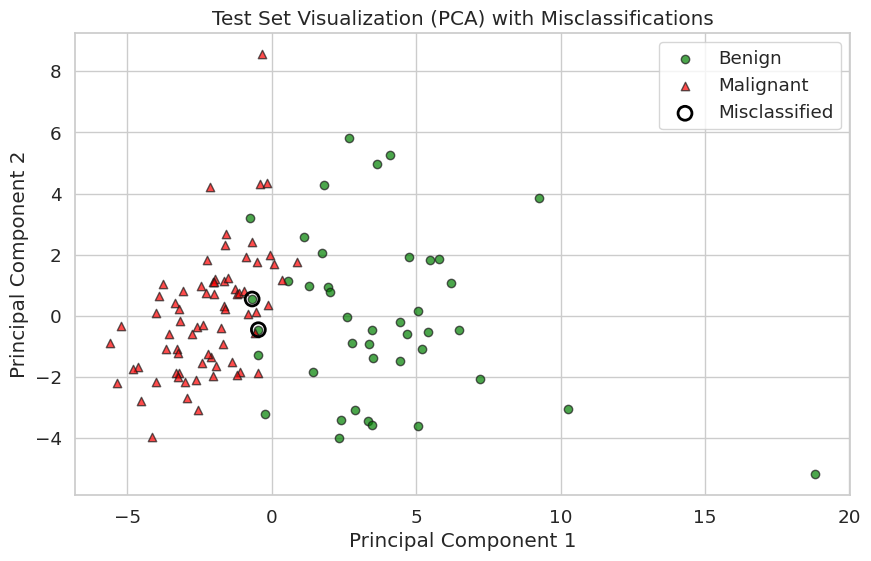


Conclusion:

The KNN classifier with k=3 achieved impressive results on the Breast Cancer Wisconsin dataset:
- Accuracy: 0.9825 - 98.2% of all predictions were correct
- Precision: 0.9730 - When the model predicted malignant, it was correct 97.3% of the time
- Recall: 1.0000 - The model correctly identified 100.0% of all malignant tumors
- F1 Score: 0.9863 - Shows a good balance between precision and recall

The high recall is particularly important in this medical context, as it means the model rarely misses actual malignant cases (low false negatives).

The confusion matrix and visualization show that most samples were correctly classified, with only a few misclassifications.

For further improvements, we could:
1. Try other algorithms (SVM, Random Forest, etc.)
2. Perform feature selection to reduce dimensionality
3. Use cross-validation for more robust evaluation
4. Apply more sophisticated preprocessing techniques



In [29]:
plt.figure(figsize=(10, 6))
idx_benign = np.where(y_test == 0)[0]
idx_malignant = np.where(y_test == 1)[0]

# Get first two principal components for visualization purposes
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

plt.scatter(X_test_pca[idx_benign, 0], X_test_pca[idx_benign, 1], c='green', marker='o', edgecolor='k', alpha=0.7, label='Benign')
plt.scatter(X_test_pca[idx_malignant, 0], X_test_pca[idx_malignant, 1], c='red', marker='^', edgecolor='k', alpha=0.7, label='Malignant')

# Highlight misclassified points
misclassified = np.where(y_test != y_pred)[0]
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1], s=100, facecolors='none', edgecolors='black', linewidths=2, label='Misclassified')

plt.title('Test Set Visualization (PCA) with Misclassifications')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
print("\nConclusion:")
print(f"""
The KNN classifier with k={optimal_k} achieved impressive results on the Breast Cancer Wisconsin dataset:
- Accuracy: {accuracy:.4f} - {accuracy*100:.1f}% of all predictions were correct
- Precision: {precision:.4f} - When the model predicted malignant, it was correct {precision*100:.1f}% of the time
- Recall: {recall:.4f} - The model correctly identified {recall*100:.1f}% of all malignant tumors
- F1 Score: {f1:.4f} - Shows a good balance between precision and recall

The high recall is particularly important in this medical context, as it means the model rarely misses actual malignant cases (low false negatives).

The confusion matrix and visualization show that most samples were correctly classified, with only a few misclassifications.

For further improvements, we could:
1. Try other algorithms (SVM, Random Forest, etc.)
2. Perform feature selection to reduce dimensionality
3. Use cross-validation for more robust evaluation
4. Apply more sophisticated preprocessing techniques
""")